In [1]:
import numpy as np
import pandas as pd
import cufflinks as cf
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot, init_notebook_mode
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
init_notebook_mode(connected=True)

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
np.random.seed(111)
data, blobs = make_blobs()
x = data[:, 0]
y = data[:, 1]

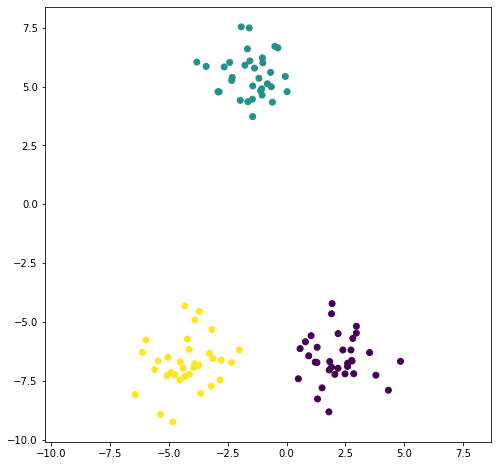

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, c=blobs)
ax.axis('equal');

In [6]:
from sklearn.cluster import KMeans

In [7]:
km3 = KMeans(n_clusters=3)
km3.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
clusters = km3.labels_
centroids = km3.cluster_centers_

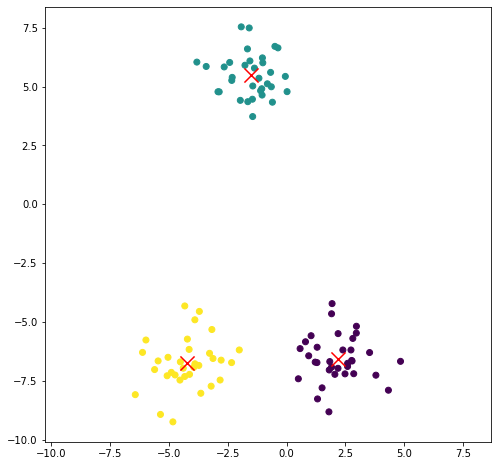

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, c=km3.labels_)
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)
ax.axis('equal');

In [10]:
km2 = KMeans(n_clusters=2)
km2.fit(data)
clusters2 = km2.labels_
centroids2 = km2.cluster_centers_

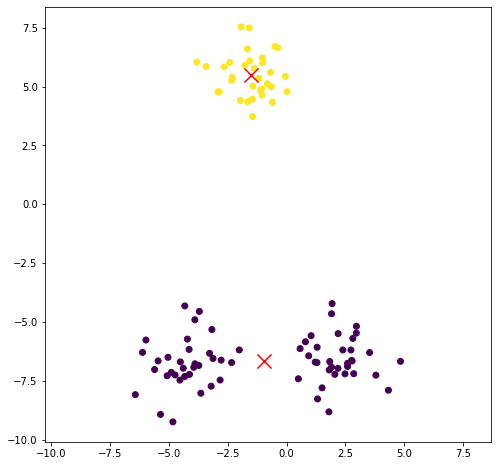

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, c=km2.labels_)
ax.scatter(centroids2[:, 0], centroids2[:, 1], c='red', marker='x', s=200)
ax.axis('equal');

In [12]:
blob_centers = np.array([[-4.5, -4.5], [-7, -7], [-3, 3]])
data_overlap, blob_overlap = make_blobs(n_samples=600, centers=blob_centers)
x_overlap = data_overlap[:, 0]
y_overlap = data_overlap[:, 1]

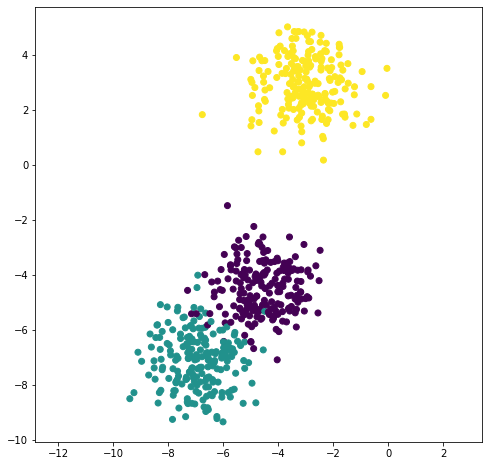

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_overlap, y_overlap, c=blob_overlap)
ax.axis('equal');

In [14]:
km_overlap3 = KMeans(n_clusters=3)
km_overlap3.fit(data_overlap)
clusters_overlap3 = km_overlap3.labels_
centroids_overlap3 = km_overlap3.cluster_centers_

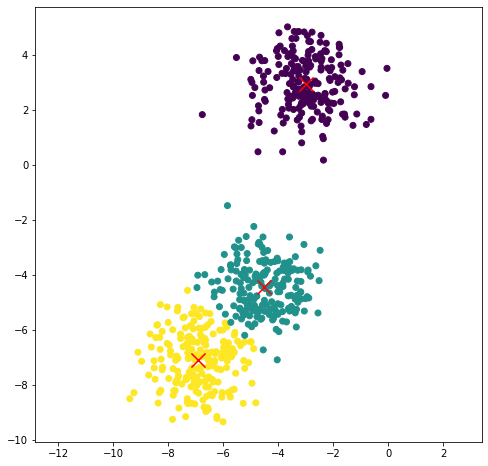

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_overlap, y_overlap, c=clusters_overlap3)
ax.scatter(centroids_overlap3[:, 0], centroids_overlap3[:, 1], c='red', marker='x', s=200)
ax.axis('equal');

In [16]:
km_overlap2 = KMeans(n_clusters=2)
km_overlap2.fit(data_overlap)
clusters_overlap2 = km_overlap2.labels_
centroids_overlap2 = km_overlap2.cluster_centers_

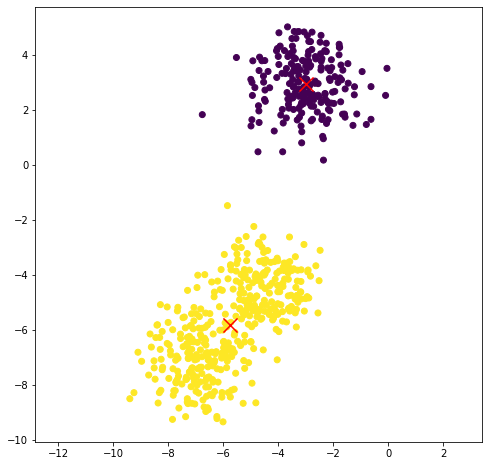

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_overlap, y_overlap, c=clusters_overlap2)
ax.scatter(centroids_overlap2[:, 0], centroids_overlap2[:, 1], c='red', marker='x', s=200)
ax.axis('equal');

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
silhouette_score(data_overlap, clusters_overlap3)

0.6149791353839875

In [20]:
silhouette_score(data_overlap, clusters_overlap2)

0.7282411982486433

In [21]:
trm = np.array([[3, -0.8], [-0.8, 1]])
gaussian_overlap = data_overlap @ trm
gaussian_extra = make_blobs(n_samples=200, centers=np.array([[0, 0]]))[0] @ np.array([[4, 1], [1, 1]]) + np.array([-20, 10])
gaussian_overlap_all = np.vstack([gaussian_overlap, gaussian_extra])
x_gaussian = gaussian_overlap_all[:, 0]
y_gaussian = gaussian_overlap_all[:, 1]

In [22]:
blob_overlap_all = np.append(blob_overlap, 200 * [3])

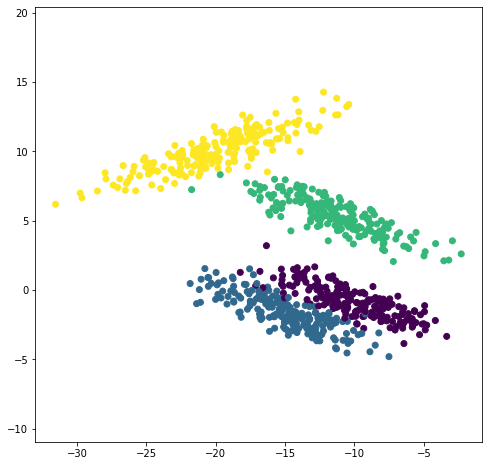

In [23]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_gaussian, y_gaussian, c=blob_overlap_all)
ax.axis('equal');

In [24]:
k_means_gaussian = KMeans(n_clusters=4)
k_means_gaussian.fit(gaussian_overlap_all)
g_centroids = k_means_gaussian.cluster_centers_

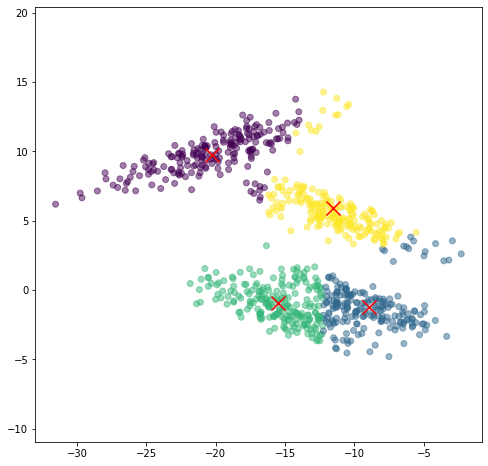

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_gaussian, y_gaussian, c=k_means_gaussian.labels_, alpha=0.5)
ax.scatter(g_centroids[:, 0], g_centroids[:, 1], marker='x', c='red', s=200)
ax.axis('equal');

In [26]:
from sklearn.mixture import GaussianMixture

In [27]:
gmm = GaussianMixture(n_components=4)
gmm.fit(gaussian_overlap_all)
g_clusters = gmm.predict(gaussian_overlap_all)

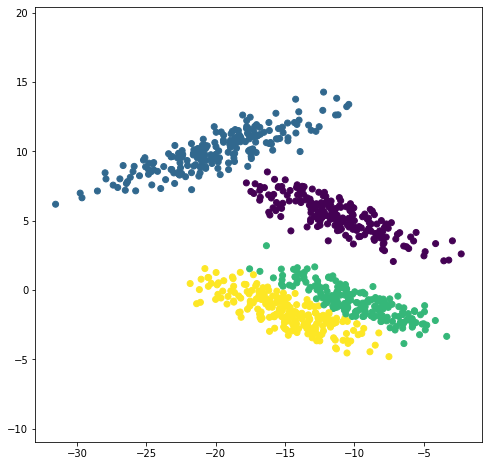

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_gaussian, y_gaussian, c=g_clusters)
ax.axis('equal');

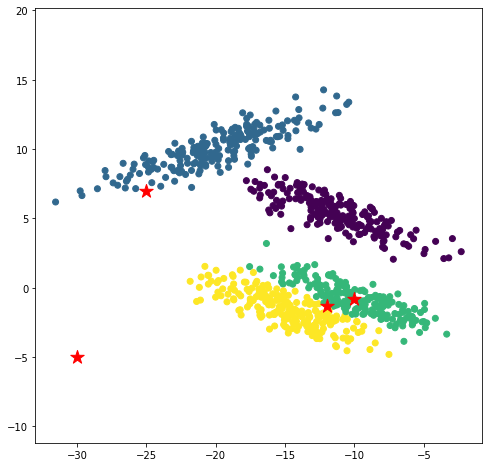

In [29]:
test_data = np.array([[-25, 7], [-10, -0.8], [-12, -1.3], [-30, -5]])

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_gaussian, y_gaussian, c=g_clusters)
ax.scatter(test_data[:, 0], test_data[:, 1], c='red', marker='*', s=200)
ax.axis('equal');

In [30]:
gmm_predictions = gmm.predict_proba(test_data).round(3)
gmm_predictions

array([[0.   , 1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.997, 0.003],
       [0.   , 0.   , 0.497, 0.503],
       [0.   , 0.   , 0.   , 1.   ]])

In [31]:
np.exp(gmm.score_samples(test_data))

array([9.86703056e-04, 1.92282351e-02, 6.74561421e-03, 5.67680642e-32])

In [32]:
silhouette_score(gaussian_overlap_all, k_means_gaussian.labels_)

0.4818660235611062

In [33]:
silhouette_score(gaussian_overlap_all, g_clusters)

0.397243056290386

In [34]:
from sklearn.metrics import homogeneity_score

In [35]:
homogeneity_score(blob_overlap_all, k_means_gaussian.labels_)

0.6885503249026375

In [36]:
homogeneity_score(blob_overlap_all, g_clusters)

0.9277303118229167

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
dbscan = DBSCAN(eps=1)

In [39]:
dbscan.fit(gaussian_overlap_all)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

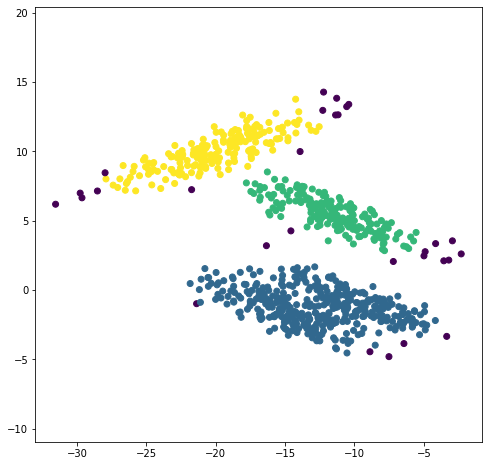

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_gaussian, y_gaussian, c=dbscan.labels_)
ax.axis('equal');

In [41]:
dbscan_signal_indices = np.argwhere(dbscan.labels_ != -1).flatten()
dbscan_signal = gaussian_overlap_all[dbscan_signal_indices]
dbscan_clusters = dbscan.labels_[dbscan_signal_indices]

In [42]:
silhouette_score(dbscan_signal, dbscan_clusters)

0.4707400992481944

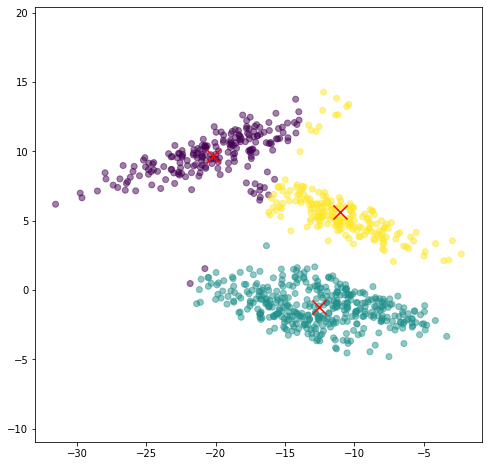

In [43]:
km3.fit(gaussian_overlap_all)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_gaussian, y_gaussian, c=km3.labels_, alpha=0.5)
ax.scatter(km3.cluster_centers_[:, 0], km3.cluster_centers_[:, 1], marker='x', c='red', s=200)
ax.axis('equal');

In [44]:
silhouette_score(gaussian_overlap_all, km3.labels_)

0.46743352233825575

In [45]:
# Principle Component Analysis
np.random.seed(122)
single_iso = make_blobs(n_samples=500, n_features=2, centers=np.array([[0, 0]]))[0]
trm_single = np.array([[5, 2], [3, 3]])
single_data = single_iso @ trm_single
x_single = single_data[:, 0]
y_single = single_data[:, 1]

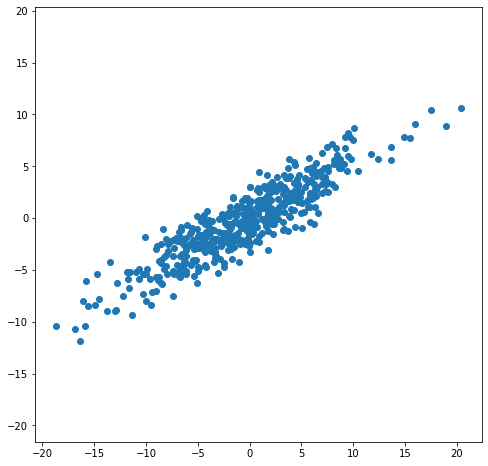

In [46]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_single, y_single)
ax.axis('equal');

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca_single = PCA(n_components=2)
pca_single.fit(single_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
# Don't forget to cite JVP in this!!!
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=3,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

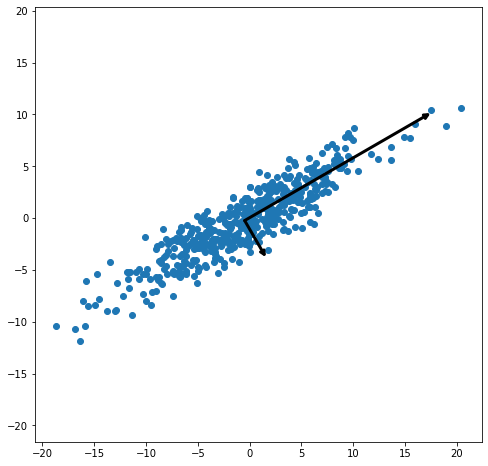

In [50]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_single, y_single)

for length, vector in zip(pca_single.explained_variance_, pca_single.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca_single.mean_, pca_single.mean_ + v)
plt.axis('equal');

In [51]:
pca_single = PCA(n_components=0.99)
pca_single.fit(single_data)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [52]:
pca_single.n_components_

2

In [53]:
pca_single = PCA(n_components=0.95)
pca_single.fit(single_data)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [54]:
pca_single.n_components_

1

In [55]:
pca_space_data = pca_single.transform(single_data)

In [57]:
transformed_data = pca_single.inverse_transform(pca_space_data)
x_transformed = transformed_data[:, 0]
y_transformed = transformed_data[:, 1]

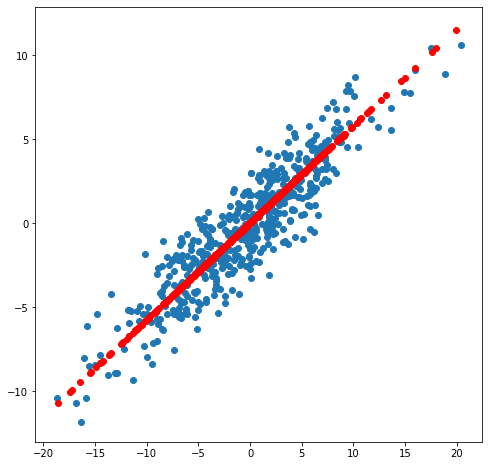

In [58]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_single, y_single)
ax.scatter(x_transformed, y_transformed, c='red');

In [59]:
np.random.seed(99)
data, blobs = make_blobs(n_samples=600, n_features=3)

In [60]:
color_dict = {1: 'darkolivegreen',  2: 'darkorange', 3: 'steelblue'}

In [61]:
blob_colors = np.array([color_dict[c] for c in blobs+1])

In [62]:
trace1 = go.Scatter3d(
    x=data[:, 0],
    y=data[:, 1],
    z=data[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=blob_colors,
        colorscale='viridis',
        opacity=0.8,
        line=dict(
            color='black',
            width=1
        )
    )
)

plot_data = [trace1]
layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
fig = go.Figure(data=plot_data, layout=layout)

In [63]:
iplot(fig)

In [64]:
pca2d = PCA(n_components=0.95)
plot_data = pca2d.fit_transform(data)

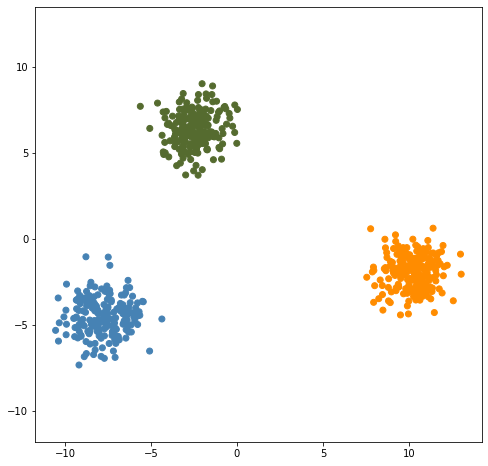

In [65]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(plot_data[:, 0], plot_data[:, 1], c=blob_colors)
ax.axis('equal');

In [66]:
from sklearn.datasets import load_wine

In [67]:
wine = load_wine()

In [68]:
wine_df = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])

In [69]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [70]:
wine_df_norm = (wine_df - wine_df.mean()) / wine_df.std()

In [72]:
wine_pca95 = PCA(n_components=0.95)
wine_pca95.fit(wine_df_norm.values)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [73]:
wine_pca95.explained_variance_ratio_.cumsum()

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717])

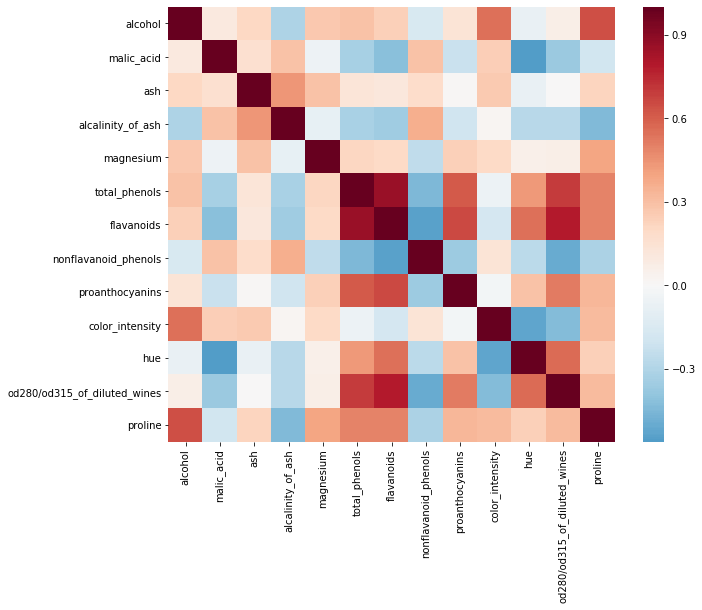

In [74]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(wine_df.corr(), ax=ax, cmap='RdBu_r', center=0)

In [75]:
wine_pca95_values = wine_pca95.transform(wine_df_norm.values)
wine_pca95_components = [f'pca_{x+1}' for x in range(wine_pca95.n_components_)]

In [76]:
wine_pca95_df = pd.DataFrame(data=wine_pca95_values, columns=wine_pca95_components)

In [77]:
wine_pca_component_df = pd.DataFrame(
    data=wine_pca95.components_.T,
    columns=wine_pca95_components,
    index=wine_df.columns
)

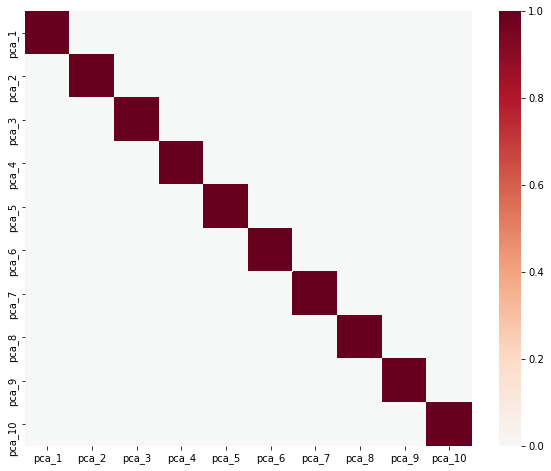

In [78]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(wine_pca95_df.corr(), ax=ax, cmap='RdBu_r', center=0)

# Clustermapping!

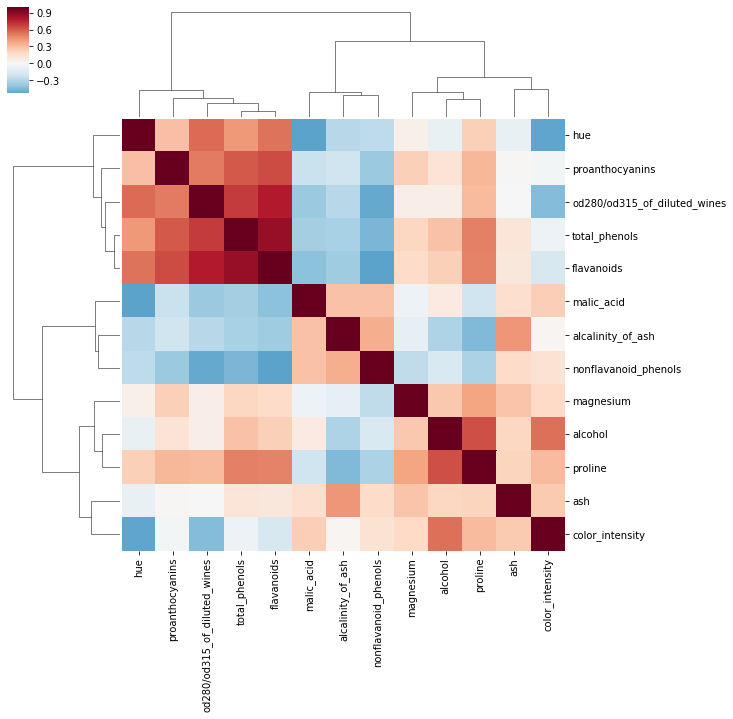

In [79]:
sns.clustermap(
    data=wine_df.corr(),
    method='ward',
    cmap='RdBu_r',
    center=0,
    robust=True
);

In [80]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
wine_linkage = linkage(wine_df.corr(), method='ward')

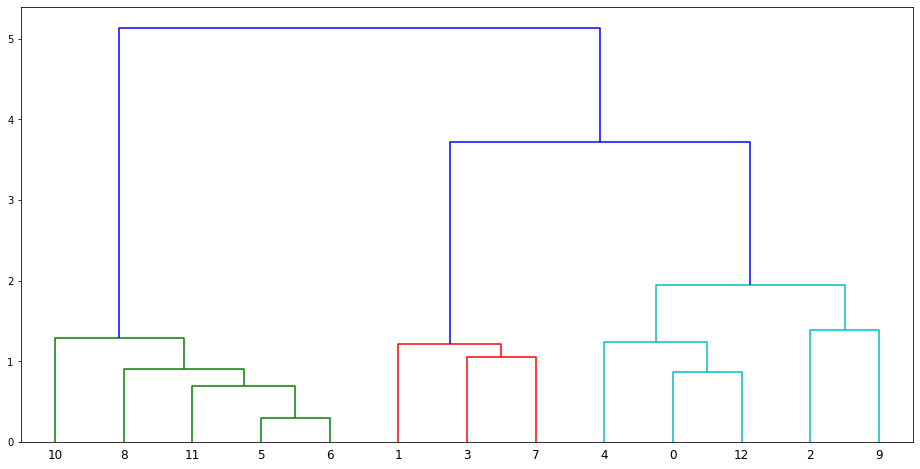

In [81]:
fig, ax = plt.subplots(figsize=(16, 8))
dendrogram(
    wine_linkage,
)
plt.show()

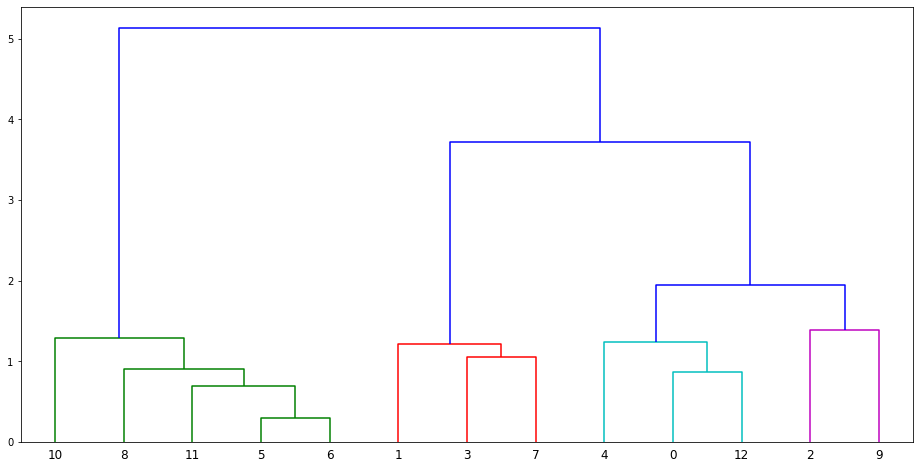

In [82]:
fig, ax = plt.subplots(figsize=(16, 8))
dendrogram(
    wine_linkage,
    color_threshold=1.5
)
plt.show()

In [83]:
wine_clusters = fcluster(wine_linkage, 4, criterion='maxclust')

In [84]:
wine_cluster_df = pd.DataFrame({'feature': wine_df.columns, 'clusters': wine_clusters})

In [85]:
wine_cluster_df.sort_values('clusters')

,feature,clusters
5,total_phenols,1
6,flavanoids,1
8,proanthocyanins,1
10,hue,1
11,od280/od315_of_diluted_wines,1
1,malic_acid,2
3,alcalinity_of_ash,2
7,nonflavanoid_phenols,2
0,alcohol,3
4,magnesium,3


In [86]:
brain_network_df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

In [87]:
brain_network_df.head()

network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   

network          4                     5             ...         16  \
node             1                     1             ...          3   
hemi            lh         rh         lh         rh  ...         rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...   0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...  57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...  28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...  71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...  95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 62 columns]

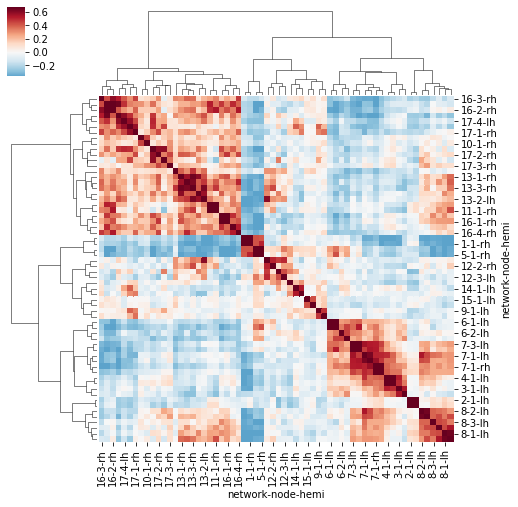

In [89]:
sns.clustermap(
    brain_network_df.corr(),
    method='ward',
    robust=True,
    cmap='RdBu_r',
    center=0, 
    figsize=(8, 8)
);

In [90]:
cf.go_offline()

In [91]:
df=cf.datagen.ohlc()
qf=cf.QuantFig(df,title='First Quant Figure',legend='top',name='GS')
qf.iplot()

In [92]:
df.head()

,open,high,low,close
2015-01-01,100.000000,120.709465,86.204102,105.913877
2015-01-02,108.455292,117.426468,90.430259,93.778218
2015-01-03,94.821505,103.806919,79.335053,94.415133
2015-01-04,95.001604,99.191104,62.858031,88.000658
2015-01-05,89.228794,95.465491,70.901294,88.687398


# Stocks of interest

* Tech Stocks
    * Microsoft MSFT
    * Apple AAPL
    * Facebook FB
    * Netflix NFLX
    * Google GOOGL
    * Twitter TWTR
    * Oracle ORCL
    * Amazon AMZN
    * Paypal PYPL
    * Tesla TSLA
* Pharma Stocks
    * Pfizer PFE
    * Eli Lilly LLY
    * Glaxo GSK
    * Novartis NVS
    * Merck MRK
    * Sanofi GCVRZ

In [93]:
# import pandas_datareader as web
# from datetime import datetime

# start = datetime(2019, 1, 1)
# end = datetime.today().date()

# stocks = ['MSFT', 'AAPL', 'FB', 'NFLX', 'GOOGL', 'TWTR', 'ORCL', 'AMZN', 'PYPL',
#           'TSLA', 'PFE', 'LLY', 'GSK', 'NVS', 'MRK', 'GCVRZ']

# stock_df = web.DataReader(stocks, 'iex', start, end)

# stock_df.to_csv('tech_pharma_stocks.csv')

In [94]:
stock_df = pd.read_csv('tech_pharma_stocks.csv', header=[0, 1], index_col=0)

In [95]:
stock_df.head()

Attributes      open                                                       \
Symbols         AAPL     AMZN      FB   GCVRZ    GOOGL      GSK       LLY   
date                                                                        
2019-01-02  153.6368  1465.20  128.99  0.4900  1027.20  36.7547  113.5342   
2019-01-03  142.8151  1520.01  134.69  0.4848  1050.67  37.0855  113.4650   
2019-01-04  143.3607  1530.00  134.01  0.4602  1042.56  37.0855  110.9824   
2019-01-07  147.4969  1602.31  137.56  0.4700  1080.97  37.5526  111.1407   
2019-01-08  148.3500  1664.69  139.89  0.4720  1086.00  37.3191  114.4244   

Attributes                             ...   volume                      \
Symbols         MRK      MSFT    NFLX  ...      LLY       MRK      MSFT   
date                                   ...                                
2019-01-02  74.7825   98.7610  259.28  ...  4247101  14427639  35329345   
2019-01-03  75.0507   99.3067  270.20  ...  4203286  13273470  42578410   
2019-01-04  74.2363   98.9297  281.88  ...  5795155  14077352  44060620   
2019-01-07  75.6367  100.8345  302.10  ...  7749593  15071652  35656136   
2019-01-08  75.3586  102.2234  319.98  ...  3428938  11351852  31514415   

Attributes                                                             \
Symbols         NFLX      NVS      ORCL       PFE      PYPL      TSLA   
date                                                                    
2019-01-02  11679528  1570420  14320441  25076212  10146197  11658648   
2019-01-03  14969647  3302060  19868713  27043208   9650676   6965184   
2019-01-04  19330102  1759319  20983953  25754634   9234825   7394116   
2019-01-07  18620116  1808616  17967907  19919838  11094140   7551225   
2019-01-08  15359180  2433171  16255688  18669087   8307637   7008516   

Attributes            
Symbols         TWTR  
date                  
2019-01-02  15053718  
2019-01-03  19051650  
2019-01-04  23412594  
2019-01-07  19917785  
2019-01-08  18915169  

[5 rows x 80 columns]

In [96]:
stock_close_corr = stock_df['close'].corr(method='spearman')

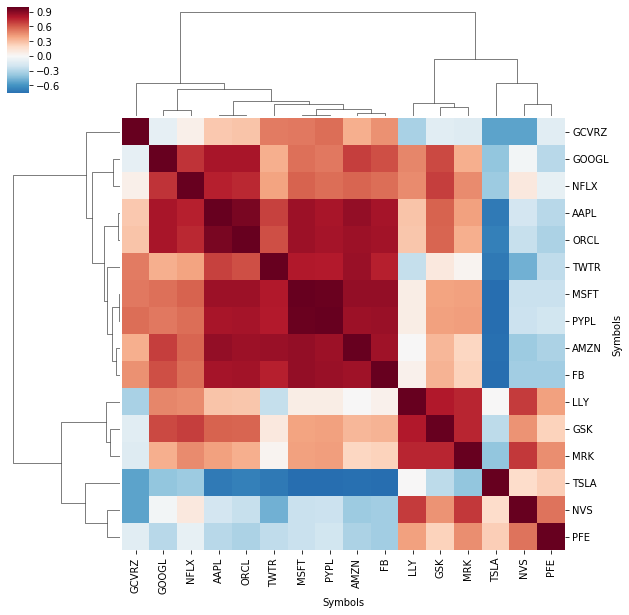

In [97]:
sns.clustermap(
    stock_close_corr,
    method='ward',
    cmap='RdBu_r',
    center=0,
    robust=True
);

In [98]:
stock_df.head()

Attributes      open                                                       \
Symbols         AAPL     AMZN      FB   GCVRZ    GOOGL      GSK       LLY   
date                                                                        
2019-01-02  153.6368  1465.20  128.99  0.4900  1027.20  36.7547  113.5342   
2019-01-03  142.8151  1520.01  134.69  0.4848  1050.67  37.0855  113.4650   
2019-01-04  143.3607  1530.00  134.01  0.4602  1042.56  37.0855  110.9824   
2019-01-07  147.4969  1602.31  137.56  0.4700  1080.97  37.5526  111.1407   
2019-01-08  148.3500  1664.69  139.89  0.4720  1086.00  37.3191  114.4244   

Attributes                             ...   volume                      \
Symbols         MRK      MSFT    NFLX  ...      LLY       MRK      MSFT   
date                                   ...                                
2019-01-02  74.7825   98.7610  259.28  ...  4247101  14427639  35329345   
2019-01-03  75.0507   99.3067  270.20  ...  4203286  13273470  42578410   
2019-01-04  74.2363   98.9297  281.88  ...  5795155  14077352  44060620   
2019-01-07  75.6367  100.8345  302.10  ...  7749593  15071652  35656136   
2019-01-08  75.3586  102.2234  319.98  ...  3428938  11351852  31514415   

Attributes                                                             \
Symbols         NFLX      NVS      ORCL       PFE      PYPL      TSLA   
date                                                                    
2019-01-02  11679528  1570420  14320441  25076212  10146197  11658648   
2019-01-03  14969647  3302060  19868713  27043208   9650676   6965184   
2019-01-04  19330102  1759319  20983953  25754634   9234825   7394116   
2019-01-07  18620116  1808616  17967907  19919838  11094140   7551225   
2019-01-08  15359180  2433171  16255688  18669087   8307637   7008516   

Attributes            
Symbols         TWTR  
date                  
2019-01-02  15053718  
2019-01-03  19051650  
2019-01-04  23412594  
2019-01-07  19917785  
2019-01-08  18915169  

[5 rows x 80 columns]

In [99]:
stock_df.xs('MSFT', level='Symbols', axis=1).head()

Attributes,open,high,low,close,volume
date,,,,,
2019-01-02,98.7610,100.9436,98.1559,100.3186,35329345
2019-01-03,99.3067,99.3910,96.4297,96.6281,42578410
2019-01-04,98.9297,101.6976,98.1459,101.1222,44060620
2019-01-07,100.8345,102.4497,100.1797,101.2511,35656136
2019-01-08,102.2234,103.1460,100.9073,101.9853,31514415


In [100]:
cf.go_offline()

In [105]:
stock_df['close'][['MSFT', 'PYPL']].iplot()

In [123]:
stock_df['close'][['LLY', 'GSK', 'MRK']].iplot()

In [169]:
msft_qf = cf.QuantFig(stock_df.xs('MSFT', level='Symbols', axis=1), title='MSFT', showlegend=False)

In [158]:
pypl_qf = cf.QuantFig(stock_df.xs('PYPL', level='Symbols', axis=1), name='PYPL', showlegend=True)